# **Importing Libraries**

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# **Uploading Dataset**

In [126]:
data = pd.read_csv("/content/HeartDisease_Data.csv")
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

# **Data Wrangling**

<Axes: >

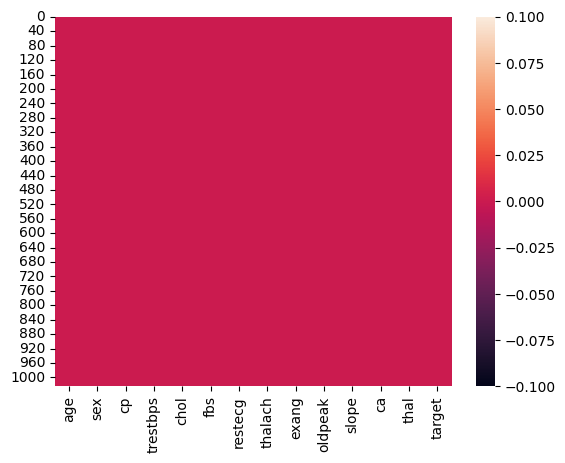

In [127]:
sns.heatmap(data.isnull())

# **Data Analysis**

<Axes: xlabel='target', ylabel='count'>

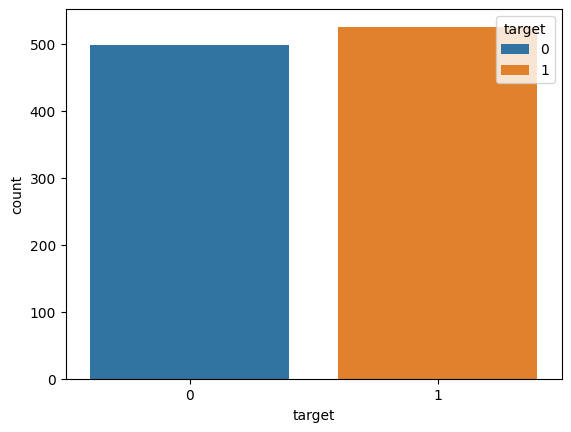

In [128]:
sns.countplot(data, x="target", hue="target")

In [129]:
data['target'].value_counts()

,count
target,
1,526
0,499


# **Separating input(x) & Output(y)**

In [130]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(y.shape)

(1025,)


# **Splitting Dataset into Train & Test**

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


# **Logistic Regression**

In [132]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [133]:
cr=classification_report(y_test,lr.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       101
           1       0.84      0.94      0.89       104

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



# **K-Nearest Neighbor(KNN)**

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [135]:
cr=classification_report(y_test,knn.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       101
           1       0.76      0.73      0.75       104

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



# **Support Vector Machine (SVM)**

In [136]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [137]:
cr=classification_report(y_test,svm.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       101
           1       0.81      0.95      0.88       104

    accuracy                           0.86       205
   macro avg       0.88      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



# **Random Forest**

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [139]:
cr=classification_report(y_test,rf.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.97      0.97      0.97       104

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



# **Saving the Model**

In [140]:
import pickle

In [141]:
filename='heart_disease_prediction_model.sav'
pickle.dump(rf,open(filename,'wb'))

In [142]:
loaded_model=pickle.load(open('heart_disease_prediction_model.sav','rb'))

# **Predictive System**

In [143]:
input_data = (55,	0,	1,	134,	230,	1, 1,	150,	1,	2.5,	2	,2,	1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# prediction=lr.predict(input_data_reshaped)
# prediction=knn.predict(input_data_reshaped)
# prediction=svm.predict(input_data_reshaped)

prediction=loaded_model.predict(input_data_reshaped)

print(prediction)
if(prediction[0]==0):
  print("The Person does not have a heart disease")
else:
  print("The Person have a heart disease")

[0]
The Person does not have a heart disease
